In [1]:
# Import files and setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


In [2]:
# Files to load

mouse_metadata_to_load = "Mouse_metadata.csv"
study_results_to_load = "Study_results.csv"


In [3]:
# Setup into Pandas DataFrames

mouse_data = pd.read_csv(mouse_metadata_to_load)
study_data = pd.read_csv(study_results_to_load)

In [4]:
# Combine the two spreadsheets 

complete_data = pd.merge(mouse_data, study_data, how="left", on=["Mouse ID", "Mouse ID"])
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Display unique mice IDs

unique_mouse_IDs = complete_data["Mouse ID"].value_counts()
number_of_mice = len(unique_mouse_IDs)
number_of_mice

249

In [6]:
# Check for duplicate time points for Mouse ID
duplicated_mice = complete_data.loc[complete_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicated_mice


array(['g989'], dtype=object)

In [7]:
# Display the data associated with that mouse ID

dup_mouse = complete_data.loc[complete_data["Mouse ID"] =="g989", :
                             
                             ]
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a new DataFrame where this data is removed. 

cleaned_data = complete_data[complete_data['Mouse ID'].isin(duplicated_mice)==False]
                          
                            
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Display the updated number of unique mice IDs

updated_mice_IDs = len(cleaned_data["Mouse ID"].value_counts())
updated_mice_IDs

248

In [10]:
# Generate Summary Stats 
# A row for each drug regimen. These regimen names should be contained in the index column.
# A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.

mean_drug_regimen = cleaned_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median_drug_regimen = cleaned_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance_drug_regimen = cleaned_data.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
std_drug_regimen = cleaned_data.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem_drug_regimen = cleaned_data.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({"Mean Tumor Volume": mean_drug_regimen,
                              "Median Tumor Volume": median_drug_regimen,
                              "Variance Tumor Volume": variance_drug_regimen,
                              "STD Tumor Volume": std_drug_regimen,
                              "SEM Tumor Volume": sem_drug_regimen,
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,STD Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate two bar charts. Both charts should be identical and show the total total number of rows ...
# (Mouse ID/Timepoints) for each drug regimen throughout the study.

# Create the first bar chart with the Pandas DataFrame.plot() method.
# Create the second bar chart with Matplotlib's pyplot methods.




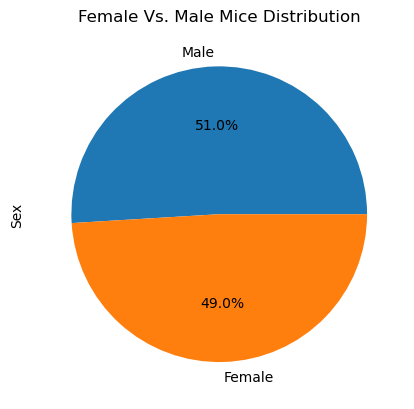

In [12]:
# Show the distribution of female versus male mice in the study, using Pandas plot.

sex_dist = cleaned_data["Sex"].value_counts()
sex_dist.plot.pie(autopct= "%1.1f%%")
plt.title("Female Vs. Male Mice Distribution")
plt.show()

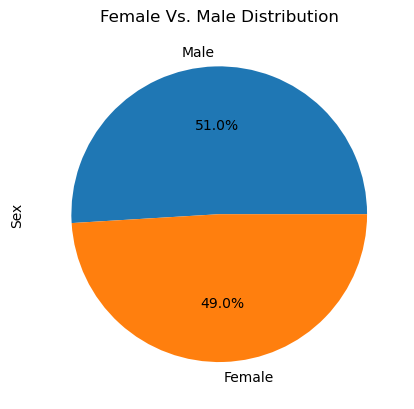

In [13]:
# Show the distribution of female versus male mice in the study, using pyplot.

labels = ['Female', 'Male']
sizes = [49.0, 51.0]
plot = sex_dist.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')          
plt.title("Female Vs. Male Distribution")          
plt.show()          

In [14]:
# Calculate Quartiles, Find Outliers, and Create a Box Plot
# Create DataFrames for each of the promising treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin)


In [19]:
df_capomulin = cleaned_data.loc[cleaned_data['Drug Regimen'] == "Capomulin"]
df_ramicane = cleaned_data.loc[cleaned_data['Drug Regimen'] == "Ramicane"]
df_infubinol = cleaned_data.loc[cleaned_data['Drug Regimen'] == "Infubinol"]
df_ceftamin = cleaned_data.loc[cleaned_data['Drug Regimen'] == "Ceftamin"]

# Combine the dataframes into one
all_dfs = [df_capomulin, df_ramicane, df_infubinol, df_ceftamin]
all_drugs_df = pd.concat(all_dfs)
all_drugs_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3
